# Analyse the resulting tables and concatenate them together 

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib import pyplot as plt
from numpy import nan
import ast

## 1. Large tables :

ClinVar 1st stage of mapping (to Ensembl using rs identifiers)

ClinVar 2nd stage of mapping (to Ensembl using coordinates)

ClinVar 3rd - fetched SNVs (the variants for which the molecular consequences have been fetched) <- ready to concat

ClinVar indels edded unfiltered (actually this contains some SNPs as well, no reason identified) <- ready to concat

Rafique 1st stage of annotatopn (with Vcfanno)

Rafique 2nd stage of annotatopn (with PubMed)

Rafique manual annotation

In [2]:
#ClinVar 1st stage of mapping (to Ensembl using rs identifiers)

ClinVar_1st = pd.read_csv('ClinVar_mapped_to_Ens_1st.csv')
ClinVar_1st

,id,seq_region_name,start,end,strand,vf_allele,Location,coordinate,Gene,Transcript,Exon
0,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000650354,ENSE00003522948
1,rs869320673,3,57260016.0,57260016.0,1.0,A,3:57260016,3:57260016:T>A,ENSG00000157500,ENST00000650354,ENSE00003516737
2,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000482800,ENSE00003527210
3,rs869320673,3,57260016.0,57260016.0,1.0,A,3:57260016,3:57260016:T>A,ENSG00000157500,ENST00000482800,ENSE00003585026
4,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000468342,ENSE00001849559
...,...,...,...,...,...,...,...,...,...,...,...
8709,rs886054724,2,10048394.0,10048394.0,1.0,T,2:10048394,2:10048394:C>T,ENSG00000172059,ENST00000305883,ENSE00001171571
8710,rs563767876,2,10048506.0,10048506.0,1.0,T,2:10048506,2:10048506:G>T,ENSG00000172059,ENST00000305883,ENSE00001171571
8711,rs757875185,2,10052364.0,10052364.0,1.0,T,2:10052364,2:10052364:A>T,ENSG00000172059,ENST00000305883,ENSE00001337294
8712,rs750063435,2,10052418.0,10052418.0,1.0,T,2:10052418,2:10052418:G>T,ENSG00000172059,ENST00000305883,ENSE00001337294


In [3]:
#how many variants in it

len(ClinVar_1st['id'].unique())

1588

In [4]:
#list of varinat isd in it

ClinVar_1st_list = ClinVar_1st['id'].unique().tolist()
ClinVar_1st_list

['rs796065047',
 'rs869320673',
 'rs141223649',
 'rs1057524893',
 'rs115949425',
 'rs8192687',
 'rs139484221',
 'rs77456357',
 'rs149701175',
 'rs35572169',
 'rs374950521',
 'rs148408134',
 'rs138771673',
 'rs772082412',
 'rs1800000',
 'rs115322623',
 'rs151310594',
 'rs527638422',
 'rs61756423',
 'rs35067467',
 'rs76910192',
 'rs767098711',
 'rs35398707',
 'rs138812345',
 'rs62001864',
 'rs372606055',
 'rs139579928',
 'rs552066337',
 'rs768726421',
 'rs200073044',
 'rs1800572',
 'rs7637863',
 'rs121909741',
 'rs121909746',
 'rs1715394753',
 'rs147959014',
 'rs5398',
 'rs761151597',
 'rs1586744173',
 'rs141467694',
 'rs868197660',
 'rs879255608',
 'rs72687988',
 'rs148199056',
 'rs776030305',
 'rs377094207',
 'rs6415788',
 'rs755318788',
 'rs529418802',
 'rs80161424',
 'rs745511715',
 'rs765583144',
 'rs806052',
 'rs534295783',
 'rs75462592',
 'rs764072714',
 'rs374943049',
 'rs376031632',
 'rs138497710',
 'rs200959196',
 'rs76342955',
 'rs752335934',
 'rs200263979',
 'rs1293183683',
 

In [5]:
#ClinVar 2nd stage of mapping (to Ensembl using coordinates)

ClinVar_2nd = pd.read_csv('ClinVar_mapped_to_Ens_2nd.csv')
ClinVar_2nd

,id,seq_region_name,start,end,strand,vf_allele,Location,coordinate,Gene,Transcript,Exon
0,rs183787750,3,57268430.0,57268430.0,1.0,G,3:57268430,3:57268430:A>G,ENSG00000157500,ENST00000650354,ENSE00001032946
1,rs754470733,12,120978644.0,120978650.0,1.0,GGGGGG,12:120978644,12:120978644:GGGGGGG>GGGGGG,ENSG00000135100,ENST00000257555,ENSE00001893688
2,rs1275805852,12,120978802.0,120978802.0,1.0,T,12:120978802,12:120978802:C>T,ENSG00000135100,ENST00000257555,ENSE00001893688
3,rs1001854457,12,120978866.0,120978866.0,1.0,G,12:120978866,12:120978866:C>G,ENSG00000135100,ENST00000257555,ENSE00001893688
4,rs373180062,12,120978907.0,120978907.0,1.0,A,12:120978907,12:120978907:G>A,ENSG00000135100,ENST00000257555,ENSE00001893688
...,...,...,...,...,...,...,...,...,...,...,...
428,rs201499958,11,17407075.0,17407075.0,1.0,G,11:17407075,11:17407075:C>G,ENSG00000006071,ENST00000527905,ENSE00003483011
429,rs201499958,11,17407075.0,17407075.0,1.0,G,11:17407075,11:17407075:C>G,ENSG00000006071,ENST00000644542,ENSE00003817955
430,rs372930264,11,17461599.0,17461599.0,1.0,T,11:17461599,11:17461599:G>T,ENSG00000006071,ENST00000683253,ENSE00003917065
431,rs372930264,11,17461599.0,17461599.0,1.0,T,11:17461599,11:17461599:G>T,ENSG00000006071,ENST00000646737,ENSE00003816790


In [6]:
##how many variants in it

len(ClinVar_2nd['id'].unique())

119

In [7]:
#list of varinat isd in it

ClinVar_2nd_list = ClinVar_2nd['id'].unique().tolist()
ClinVar_2nd_list

['rs183787750',
 'rs754470733',
 'rs1275805852',
 'rs1001854457',
 'rs373180062',
 'rs1391743259',
 'rs779442858',
 'rs188085301',
 'rs202180554',
 'rs200442958',
 'rs1248375417',
 'rs150513055',
 'rs1180119907',
 'rs747416693',
 'rs760640415',
 'rs765829022',
 'rs267603343',
 'rs577078110',
 'rs745460046',
 'rs587778399',
 'rs200120574',
 'rs751112023',
 'rs753972576',
 'rs747783371',
 'rs1176659689',
 'rs1319364468',
 'rs1170194230',
 'rs1441649062',
 'rs954171452',
 'rs1293307672',
 'rs1200339761',
 'rs377284693',
 'rs139264769',
 'rs764196059',
 'rs201749293',
 'rs1032164393',
 'rs753476712',
 'rs376013528',
 'rs1259110384',
 'rs763307492',
 'rs1042687',
 'rs762074022',
 'rs755704498',
 'rs1327996297',
 'rs1407888862',
 'rs1160079555',
 'rs143335817',
 'rs1054914884',
 'rs769503941',
 'rs757233968',
 'rs35817154',
 'rs139506765',
 'rs1026908617',
 'rs1169786300',
 'rs142926499',
 'rs755839409',
 'rs763728797',
 'rs775204908',
 'rs557160758',
 'rs193922487',
 'rs894213416',
 'rs1219

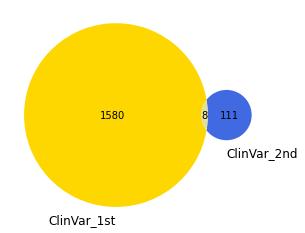

In [8]:
#do they intersect?

venn2(subsets = (set(ClinVar_1st_list), set(ClinVar_2nd_list)), set_labels = ('ClinVar_1st', 'ClinVar_2nd'), 
      set_colors = ("gold", "royalblue"), alpha=1)
plt.show()
#they intersect juct by 8 variants which is good :)
#Save the diagram in high quality
#plt.savefig('/Users/ksenia/Documents/MODY_genes/pipeline_october2022/ClinVar_1st_2nd_intersect.png', dpi=300)

In [9]:
#Everything from ClinVar mapped to Ensembl

ClinVar_Ens = pd.concat([ClinVar_1st, ClinVar_2nd]).drop_duplicates().reset_index(drop=True)
ClinVar_Ens

,id,seq_region_name,start,end,strand,vf_allele,Location,coordinate,Gene,Transcript,Exon
0,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000650354,ENSE00003522948
1,rs869320673,3,57260016.0,57260016.0,1.0,A,3:57260016,3:57260016:T>A,ENSG00000157500,ENST00000650354,ENSE00003516737
2,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000482800,ENSE00003527210
3,rs869320673,3,57260016.0,57260016.0,1.0,A,3:57260016,3:57260016:T>A,ENSG00000157500,ENST00000482800,ENSE00003585026
4,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000468342,ENSE00001849559
...,...,...,...,...,...,...,...,...,...,...,...
9142,rs201499958,11,17407075.0,17407075.0,1.0,G,11:17407075,11:17407075:C>G,ENSG00000006071,ENST00000527905,ENSE00003483011
9143,rs201499958,11,17407075.0,17407075.0,1.0,G,11:17407075,11:17407075:C>G,ENSG00000006071,ENST00000644542,ENSE00003817955
9144,rs372930264,11,17461599.0,17461599.0,1.0,T,11:17461599,11:17461599:G>T,ENSG00000006071,ENST00000683253,ENSE00003917065
9145,rs372930264,11,17461599.0,17461599.0,1.0,T,11:17461599,11:17461599:G>T,ENSG00000006071,ENST00000646737,ENSE00003816790


In [10]:
#creating yhr columns for VCF

ClinVar_Ens_VCF = []
for index, row in ClinVar_Ens.iterrows():
    ClinVar_Ens_VCF.append({'chrom': row['coordinate'].replace('>', ':').split(':')[0],
     'pos': row['coordinate'].replace('>', ':').split(':')[1],
     'ref': row['coordinate'].replace('>', ':').split(':')[2],
     'alt': row['coordinate'].replace('>', ':').split(':')[3],
     'accession': row['id']})
ClinVar_Ens_VCF_df = pd.DataFrame(ClinVar_Ens_VCF)
ClinVar_Ens_VCF_df

,chrom,pos,ref,alt,accession
0,3,57238111,G,A,rs796065047
1,3,57260016,T,A,rs869320673
2,3,57238111,G,A,rs796065047
3,3,57260016,T,A,rs869320673
4,3,57238111,G,A,rs796065047
...,...,...,...,...,...
9142,11,17407075,C,G,rs201499958
9143,11,17407075,C,G,rs201499958
9144,11,17461599,G,T,rs372930264
9145,11,17461599,G,T,rs372930264


In [11]:
len(ClinVar_Ens['id'].unique())

1699

In [12]:
ClinVar_Ens_list = ClinVar_Ens['coordinate'].unique().tolist()
len(ClinVar_Ens_list)

2189

ClinVar 3rd - fetched SNVs (the variants for which the molecular consequences have been fetched) <- ready to concat

In [13]:
ClinVar_3rd = pd.read_csv(
    'ClinVar_unmapped_filtered_SNV_for_VCF.csv')
ClinVar_3rd

,chrom,pos,ref,alt,accession
0,11,17430830,C,T,VCV001696124
1,12,121001169,C,T,VCV001687090
2,12,121001099,A,AA,VCV001687083
3,12,121001064,G,A,VCV001687082
4,12,121001077,G,T,VCV001315998
...,...,...,...,...,...
370,11,17387338,C,A,VCV001525999
371,11,17387902,C,T,VCV001525998
372,11,17387536,G,C,VCV001338466
373,6,29673291,G,A,VCV001449415


In [14]:
len(ClinVar_3rd['accession'].unique())

282

In [15]:
ClinVar_3rd_list = [] 
for index, row in ClinVar_3rd.iterrows():
    ClinVar_3rd_list.append(str(row['chrom']) + ':' + str(row['pos']) + ':' + row['ref'] + '>' + row['alt']) 
ClinVar_3rd_list

['11:17430830:C>T',
 '12:121001169:C>T',
 '12:121001099:A>AA',
 '12:121001064:G>A',
 '12:121001077:G>T',
 '7:44149798:T>TT',
 '7:44150047:C>G',
 '7:44146565:A>T',
 '7:44150024:C>G',
 '7:44153299:A>G',
 '7:44153301:C>T',
 '7:44153407:C>T',
 '7:44145222:A>C',
 '7:44145671:G>T',
 '7:44146541:A>C',
 '7:44147742:C>T',
 '7:44149825:T>A',
 '7:44149825:T>C',
 '7:44153457:G>A',
 '7:44147762:T>C',
 '7:44149768:A>G',
 '7:44145630:C>G',
 '7:44153351:G>A',
 '7:44145210:C>A',
 '7:44152419:C>T',
 '7:44152294:C>CC',
 '7:44145534:C>T',
 '7:44145603:A>G',
 '7:44151053:C>T',
 '7:44149779:G>T',
 '7:44153427:C>T',
 '7:44151042:A>G',
 '12:120988909:G>A',
 '12:120993643:C>G',
 '12:120993612:G>T',
 '12:120994211:T>A',
 '12:120979095:G>A',
 '12:120979095:G>C',
 '12:120999322:C>T',
 '12:120988903:G>T',
 '12:120999271:T>A',
 '12:120997666:G>T',
 '12:120996570:T>TT',
 '12:120999390:G>A',
 '12:120997670:G>C',
 '12:120978794:A>T',
 '12:120994273:G>A',
 '12:120994264:C>A',
 '12:120978905:A>C',
 '12:120994238:G>T',
 

In [16]:
#ClinVar indels edded unfiltered (actually this contains some SNPs as well, no reason identified) <- ready to concat

ClinVar_indels = pd.read_csv(
    'ClinVar_indels.csv')
ClinVar_indels = ClinVar_indels.replace(nan, '')
ClinVar_indels

,chrom,pos,ref,alt,accession
0,12,121001081,GG,G,VCV001700003
1,12,121001136,AA,,VCV001687087
2,12,121001116,AGAG,AG,VCV001687086
3,12,121001098,C,,VCV001687084
4,12,121001158,CATCTCCACCCAGATGGCCTCTTCCTCC,CATCTCCACCCAGATGGCCTCTTCCTCCATCTCCACCCAGATGGCC...,VCV001687077
...,...,...,...,...,...
110,2,88576632,CTAACAATGCCCGGGTGTTCAAGCT,CT,VCV001179141
111,2,88627263,GG,G,VCV001175193
112,2,10791832,CC,C,VCV001334421
113,6,116925413,AAAAAA,AAAAAAA,VCV001327955


In [17]:
len(ClinVar_indels['accession'].unique())

94

In [18]:
ClinVar_indels_list = [] 
for index, row in ClinVar_indels.iterrows():
    ClinVar_indels_list.append(str(row['chrom']) + ':' + str(row['pos']) + ':' + row['ref'] + '>' + row['alt']) 
ClinVar_indels_list

['12:121001081:GG>G',
 '12:121001136:AA>',
 '12:121001116:AGAG>AG',
 '12:121001098:C>',
 '12:121001158:CATCTCCACCCAGATGGCCTCTTCCTCC>CATCTCCACCCAGATGGCCTCTTCCTCCATCTCCACCCAGATGGCCTCTTCCTCC',
 '12:121001068:CC>',
 '7:44145499:GGGG>GGG',
 '7:44145579:TGATGA>TGA',
 '7:44145255:CGC>C',
 '7:44153361:GGG>GG',
 '7:44149980:GATAG>GATAGATAG',
 '12:120988910:A>',
 '12:120988883:ACAACA>ACA',
 '12:120999577:CC>C',
 '12:120994316:CC>T',
 '12:120978897:CC>A',
 '12:120978906:GGGGGAGTCCTGCGGCGG>G',
 '12:120994311:GGG>GGGG',
 '12:120994260:CC>C',
 '12:120978483:TC>',
 '12:120978971:GGGG>GGG',
 '12:120978959:GGGGG>GGGGGG',
 '12:120978952:AA>A',
 '12:120978929:GAGGGGAG>GAG',
 '12:120978810:GGCCCTGCTC>TG',
 '12:120978847:AT>CC',
 '12:120978787:AGCTGCAGACGGAGCT>AGCTGCAGACGGAGCTGCAGACGGAGCT',
 '12:120988931:CCC>CC',
 '12:120997531:GACCACCCTGCAGCCCG>GACCACCCTGCAGCCCGACCACCCTGCAGCCCG',
 '12:120997509:>G',
 '12:120997495:AGAG>AG',
 '12:120993575:ACCAACCAA>ACCAA',
 '12:120994324:GGG>GG',
 '17:37733738:T>',
 '17:

In [19]:
ClinVar_total_set = set(ClinVar_Ens_list + ClinVar_3rd_list + ClinVar_indels_list)
len(ClinVar_total_set)

2565

In [21]:
Rafique_1st = pd.read_csv(
    'Rafique_mapped_to_Ens_1st.csv')
Rafique_1st

,id,seq_region_name,start,end,strand,vf_allele,Location,coordinate,Gene,Transcript,Exon
0,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000650354,ENSE00003522948
1,rs869320673,3,57260016.0,57260016.0,1.0,A,3:57260016,3:57260016:T>A,ENSG00000157500,ENST00000650354,ENSE00003516737
2,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000482800,ENSE00003527210
3,rs869320673,3,57260016.0,57260016.0,1.0,A,3:57260016,3:57260016:T>A,ENSG00000157500,ENST00000482800,ENSE00003585026
4,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000468342,ENSE00001849559
...,...,...,...,...,...,...,...,...,...,...,...
844,rs1379321773,2,10047653.0,10047653.0,1.0,G,2:10047653,2:10047653:A>G,ENSG00000172059,ENST00000401510,ENSE00001561024
845,rs1391231205,2,10043730.0,10043730.0,1.0,T,2:10043730,2:10043730:A>T,ENSG00000172059,ENST00000305883,ENSE00001265488
846,rs1379321773,2,10047653.0,10047653.0,1.0,G,2:10047653,2:10047653:A>G,ENSG00000172059,ENST00000305883,ENSE00001171571
847,rs1379321773,2,10047653.0,10047653.0,1.0,G,2:10047653,2:10047653:A>G,ENSG00000172059,ENST00000448523,ENSE00001701589


In [22]:
len(Rafique_1st['id'].unique())

174

In [23]:
Rafique_2nd = pd.read_csv(
    'Rafique_mapped_to_Ens_2nd.csv', low_memory=False)
Rafique_2nd

,id,seq_region_name,start,end,strand,vf_allele,Location,coordinate,Gene,Transcript,Exon
0,rs113651985,4,6289120.0,6289120.0,1.0,T,4:6289120,4:6289120:C>T,ENSG00000109501,ENST00000503569,ENSE00000701011
1,rs567563179,4,6291208.0,6291208.0,1.0,A,4:6291208,4:6291208:G>A,ENSG00000109501,ENST00000503569,ENSE00003648875
2,rs148953711,4,6291241.0,6291241.0,1.0,A,4:6291241,4:6291241:G>A,ENSG00000109501,ENST00000503569,ENSE00003648875
3,rs774525063,4,6291971.0,6291971.0,1.0,C,4:6291971,4:6291971:T>C,ENSG00000109501,ENST00000503569,ENSE00003689853
4,rs142671083,4,6300919.0,6300919.0,1.0,A,4:6300919,4:6300919:G>A,ENSG00000109501,ENST00000503569,ENSE00002061224
...,...,...,...,...,...,...,...,...,...,...,...
1427,rs779736828,11,17413396.0,17413396.0,1.0,T,11:17413396,11:17413396:G>T,ENSG00000006071,ENST00000526921,ENSE00002195815
1428,rs72559730,11,17461663.0,17461663.0,1.0,T,11:17461663,11:17461663:G>T,ENSG00000006071,ENST00000683253,ENSE00003917065
1429,rs72559730,11,17461663.0,17461663.0,1.0,T,11:17461663,11:17461663:G>T,ENSG00000006071,ENST00000646737,ENSE00003816790
1430,rs72559730,11,17461663.0,17461663.0,1.0,T,11:17461663,11:17461663:G>T,ENSG00000006071,ENST00000684221,ENSE00003919812


In [24]:
len(Rafique_2nd['id'].unique())

280

In [25]:
#Everything from Rafique mapped to Ensembl
Rafique_Ens = pd.concat([Rafique_1st, Rafique_2nd]).drop_duplicates().reset_index(drop=True)
Rafique_Ens

,id,seq_region_name,start,end,strand,vf_allele,Location,coordinate,Gene,Transcript,Exon
0,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000650354,ENSE00003522948
1,rs869320673,3,57260016.0,57260016.0,1.0,A,3:57260016,3:57260016:T>A,ENSG00000157500,ENST00000650354,ENSE00003516737
2,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000482800,ENSE00003527210
3,rs869320673,3,57260016.0,57260016.0,1.0,A,3:57260016,3:57260016:T>A,ENSG00000157500,ENST00000482800,ENSE00003585026
4,rs796065047,3,57238111.0,57238111.0,1.0,A,3:57238111,3:57238111:G>A,ENSG00000157500,ENST00000468342,ENSE00001849559
...,...,...,...,...,...,...,...,...,...,...,...
2276,rs779736828,11,17413396.0,17413396.0,1.0,T,11:17413396,11:17413396:G>T,ENSG00000006071,ENST00000526921,ENSE00002195815
2277,rs72559730,11,17461663.0,17461663.0,1.0,T,11:17461663,11:17461663:G>T,ENSG00000006071,ENST00000683253,ENSE00003917065
2278,rs72559730,11,17461663.0,17461663.0,1.0,T,11:17461663,11:17461663:G>T,ENSG00000006071,ENST00000646737,ENSE00003816790
2279,rs72559730,11,17461663.0,17461663.0,1.0,T,11:17461663,11:17461663:G>T,ENSG00000006071,ENST00000684221,ENSE00003919812


In [26]:
len(Rafique_Ens['id'].unique())

356

In [27]:
Rafique_Ens_VCF = []
for index, row in Rafique_Ens.iterrows():
    Rafique_Ens_VCF.append({'chrom': row['coordinate'].replace('>', ':').split(':')[0],
     'pos': row['coordinate'].replace('>', ':').split(':')[1],
     'ref': row['coordinate'].replace('>', ':').split(':')[2],
     'alt': row['coordinate'].replace('>', ':').split(':')[3],
     'accession': row['id']})
Rafique_Ens_VCF_df = pd.DataFrame(Rafique_Ens_VCF)
Rafique_Ens_VCF_df

,chrom,pos,ref,alt,accession
0,3,57238111,G,A,rs796065047
1,3,57260016,T,A,rs869320673
2,3,57238111,G,A,rs796065047
3,3,57260016,T,A,rs869320673
4,3,57238111,G,A,rs796065047
...,...,...,...,...,...
2276,11,17413396,G,T,rs779736828
2277,11,17461663,G,T,rs72559730
2278,11,17461663,G,T,rs72559730
2279,11,17461663,G,T,rs72559730


In [28]:
Rafique_Ens_list = Rafique_Ens['coordinate'].unique().tolist()
Rafique_Ens_list

['3:57238111:G>A',
 '3:57260016:T>A',
 '12:120978802:C>T',
 '12:120978818:T>A',
 '12:120978860:G>A',
 '12:120978866:C>G',
 '12:120978923:G>C',
 '12:120978970:C>T',
 '12:120978993:C>A',
 '12:120978994:G>A',
 '12:120979013:C>T',
 '12:120988846:C>T',
 '12:120988853:C>T',
 '12:120988876:C>T',
 '12:120988897:C>T',
 '12:120988898:G>A',
 '12:120988981:C>T',
 '12:120988987:G>A',
 '12:120989027:C>T',
 '12:120993532:C>T',
 '12:120993579:A>G',
 '12:120993592:G>A',
 '12:120993600:C>T',
 '12:120993601:G>A',
 '12:120993675:G>A',
 '12:120993678:C>A',
 '12:120993679:G>A',
 '12:120993696:G>C',
 '12:120994166:C>T',
 '12:120994184:G>T',
 '12:120994216:T>A',
 '12:120994229:C>T',
 '12:120994238:G>A',
 '12:120994240:G>T',
 '12:120994264:C>T',
 '12:120994265:G>A',
 '12:120994277:C>A',
 '12:120994314:G>CC',
 '12:120994315:C>A',
 '12:120994321:C>A',
 '12:120994322:C>A',
 '12:120994373:C>T',
 '12:120994382:C>A',
 '12:120996271:A>G',
 '12:120996367:C>T',
 '12:120996557:G>A',
 '12:120996568:C>A',
 '12:120996569:C

In [30]:
Rafique_manual = pd.read_csv(
    'input/Rafique_manual.csv')
Rafique_manual = Rafique_manual.replace(nan, '')
Rafique_manual

,chrom,pos,ref,alt,accession
0,7,44151075,C,A,VCV000435307
1,7,44150039,G,T,VCV000036225
2,7,44189410,C,T,VCV001304540
3,7,44149844,C,T,VCV000447410
4,12,120988874,T,C,VCV001327615
5,17,37731633,T,C,VCV000635615
6,17,37733650,C,T,VCV000635660
7,17,37739550,A,T,VCV000635700
8,11,2160878,C,T,VCV000021122
9,11,17396980,C,T,VCV000009098


In [31]:
Rafique_manual_list = [] 
for index, row in Rafique_manual.iterrows():
    Rafique_manual_list.append(str(row['chrom']) + ':' + str(row['pos']) + ':' + row['ref'] + '>' + row['alt']) 
Rafique_manual_list

['7:44151075:C>A',
 '7:44150039:G>T',
 '7:44189410:C>T',
 '7:44149844:C>T',
 '12:120988874:T>C',
 '17:37731633:T>C',
 '17:37733650:C>T',
 '17:37739550:A>T',
 '11:2160878:C>T',
 '11:17396980:C>T',
 '13:27920321:C>',
 '11:17395214:C>T']

In [32]:
Rafique_all_set = set(Rafique_Ens_list + Rafique_manual_list)
len(Rafique_all_set)

481

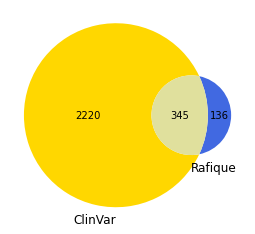

<Figure size 432x288 with 0 Axes>

In [45]:
venn2(subsets = (ClinVar_total_set, Rafique_all_set), set_labels = ('ClinVar', 'Rafique'), 
      set_colors = ("gold", "royalblue"), alpha=1)
plt.show()
plt.savefig('figures/ClinVar_Rafique.png', dpi=300)

In [34]:
VCF = pd.concat([ClinVar_Ens_VCF_df, ClinVar_3rd, ClinVar_indels, Rafique_Ens_VCF_df, Rafique_manual]).drop_duplicates().reset_index(drop=True)
VCF

,chrom,pos,ref,alt,accession
0,3,57238111,G,A,rs796065047
1,3,57260016,T,A,rs869320673
2,7,113918369,G,A,rs141223649
3,7,113918581,G,C,rs1057524893
4,7,113918700,G,A,rs115949425
...,...,...,...,...,...
2699,7,44149844,C,T,VCV000447410
2700,11,2160878,C,T,VCV000021122
2701,11,17396980,C,T,VCV000009098
2702,13,27920321,C,,VCV000021124


In [35]:
VCF.to_csv(
    'MD_variants_forVCF.csv',
    header=True, index=False)

## 2. Small tables (ClinVar with just pathogenic + likely pathogenic, Rafique table without 3 canceled genes)

ClinVar 1st stage of mapping pathogenic (to Ensembl using rs identifiers) 'ClinVar_pathogenic_mapped_1st.csv'

ClinVar 2nd stage of mapping pathogenic (to Ensembl using coordinates) 'ClinVar_pathogenic_mapped_to_Ens_2nd.csv'

ClinVar 3rd - fetched SNVs (the variants for which the molecular consequences have been fetched) <- ready to concat 'ClinVar_pat_unmapped_filtered_SNV_for_VCF.csv'

ClinVar indels edded unfiltered (actually this contains some SNPs as well, no reason identified) <- ready to concat 'ClinVar_pathogenic_indels.csv'

Rafique 1st stage of annotatopn (with Vcfanno) 'Rafique_mapped_to_Ens_1st_excluded BLK_KLF11_PAX4.csv'

Rafique 2nd stage and manual are not added as their pathogenicity may be doubtfull 

In [38]:
#ClinVar 1st stage of mapping (to Ensembl using rs identifiers)
ClinVar_1st_pat = pd.read_csv(
    'ClinVar_pathogenic_mapped_1st.csv')

#list of varinat isd in it
ClinVar_1st_pat_list = ClinVar_1st_pat['id'].unique().tolist()

#ClinVar 2nd stage of mapping (to Ensembl using coordinates)
ClinVar_2nd_pat = pd.read_csv(
    'ClinVar_pathogenic_mapped_to_Ens_2nd.csv')

#list of varinat isd in it
ClinVar_2nd_pat_list = ClinVar_2nd_pat['id'].unique().tolist()

#Everything from ClinVar mapped to Ensembl
ClinVar_Ens_pat = pd.concat([ClinVar_1st_pat, ClinVar_2nd_pat]).drop_duplicates().reset_index(drop=True)

#creating yhr columns for VCF
ClinVar_Ens_VCF_pat = []
for index, row in ClinVar_Ens_pat.iterrows():
    ClinVar_Ens_VCF_pat.append({'chrom': row['coordinate'].replace('>', ':').split(':')[0],
     'pos': row['coordinate'].replace('>', ':').split(':')[1],
     'ref': row['coordinate'].replace('>', ':').split(':')[2],
     'alt': row['coordinate'].replace('>', ':').split(':')[3],
     'accession': row['id']})
ClinVar_Ens_VCF_df_pat = pd.DataFrame(ClinVar_Ens_VCF_pat)
ClinVar_Ens_pat_list = ClinVar_Ens_pat['coordinate'].unique().tolist()

#ClinVar 3rd - fetched SNVs (the variants for which the molecular consequences have been fetched) <- ready to concat
ClinVar_3rd_pat = pd.read_csv(
    'ClinVar_pat_unmapped_filtered_SNV_for_VCF.csv')
ClinVar_3rd_pat_list = [] 
for index, row in ClinVar_3rd_pat.iterrows():
    ClinVar_3rd_pat_list.append(str(row['chrom']) + ':' + str(row['pos']) + ':' + row['ref'] + '>' + row['alt']) 

#ClinVar indels edded unfiltered (actually this contains some SNPs as well, no reason identified) <- ready to concat
ClinVar_indels_pat = pd.read_csv(
    'ClinVar_pathogenic_indels.csv')
ClinVar_indels_pat = ClinVar_indels_pat.replace(nan, '')
ClinVar_indels_pat_list = [] 
for index, row in ClinVar_indels_pat.iterrows():
    ClinVar_indels_pat_list.append(str(row['chrom']) + ':' + str(row['pos']) + ':' + row['ref'] + '>' + row['alt'])
ClinVar_total_set_pat = set(ClinVar_Ens_pat_list + ClinVar_3rd_pat_list + ClinVar_indels_pat_list)

#Rafique 1st stage
Rafique_pat = pd.read_csv(
    'Rafique_mapped_to_Ens_1st_excluded_BLK_KLF11_PAX4.csv')
Rafique_Ens_VCF_pat = []
for index, row in Rafique_pat.iterrows():
    Rafique_Ens_VCF_pat.append({'chrom': row['coordinate'].replace('>', ':').split(':')[0],
     'pos': row['coordinate'].replace('>', ':').split(':')[1],
     'ref': row['coordinate'].replace('>', ':').split(':')[2],
     'alt': row['coordinate'].replace('>', ':').split(':')[3],
     'accession': row['id']})
Rafique_Ens_VCF_pat_df = pd.DataFrame(Rafique_Ens_VCF_pat)
Rafique_pat_list = Rafique_pat['coordinate'].unique().tolist()
Rafique_pat_set = set(Rafique_pat_list)
VCF_pat = pd.concat([ClinVar_Ens_VCF_df_pat, ClinVar_3rd_pat, ClinVar_indels_pat, Rafique_Ens_VCF_pat_df]).drop_duplicates().reset_index(drop=True)
VCF_pat.to_csv(
    'MD_variants_forVCF_pathogenic.csv',
    header=True, index=False)

In [39]:
VCF_pat

,chrom,pos,ref,alt,accession
0,3,57238111,G,A,rs796065047
1,3,57260016,T,A,rs869320673
2,3,171005389,G,A,rs121909746
3,9,4125758,AG,AGAG,rs1586744173
4,9,4117797,G,A,rs868197660
...,...,...,...,...,...
871,2,181678686,C,T,rs553756272
872,17,37733788,A,T,rs760079000
873,11,17404524,C,T,rs193922400
874,2,10047653,A,G,rs1379321773


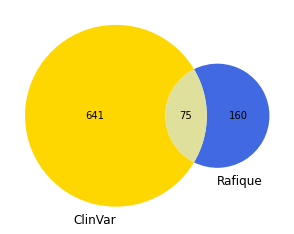

<Figure size 432x288 with 0 Axes>

In [46]:
venn2(subsets = (ClinVar_total_set_pat, Rafique_pat_set), set_labels = ('ClinVar', 'Rafique')
     ,set_colors = ("gold", "royalblue"), alpha=1)
plt.show()
plt.savefig('figures/ClinVar_Rafique_shortlist.png', dpi=300)

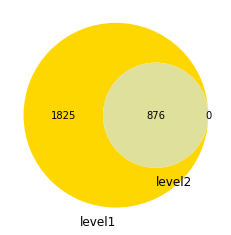

In [47]:
#Comparisson of the Level1 table to the Level2 table
venn2(subsets = (ClinVar_total_set.union(Rafique_all_set), 
                 ClinVar_total_set_pat.union(Rafique_pat_set)), 
                 set_labels = ('level1', 'level2'), 
                 set_colors = ("gold", "royalblue"), alpha=1)
plt.savefig('figures/level1_level2.png', dpi=300)